In [93]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'
PATH_USER_REPLIES_NEWS = PATH_RESULTS + 'agg_user_replies_news.csv'
PATH_USER_REPLIES_NEWS_POSTS = PATH_RESULTS + 'agg_user_replies_news_posts.csv'

PATH_FEED_POSTS = PATH_DATA + 'feed_posts/'

df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)

/tmp/ipykernel_187237/850889407.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)


In [94]:
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,1976-05-31 14:32:20.803,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,1976-05-31 14:32:02.212,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,1976-05-31 14:31:51.419,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,1976-05-31 14:31:21.410,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,1976-05-31 14:30:50.922,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,1976-05-31 15:04:51.347,La preuve qu'ils sont antidémocratiques. \nPer...,"['eng', 'fra']",4,0,0,5550653.0,4890.0,5550653.0,4890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36817,105014318,92560,bsky.social,1976-05-31 15:04:40.159,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,1976-05-31 15:04:32.216,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,1976-05-31 14:30:50.808,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


<Axes: >

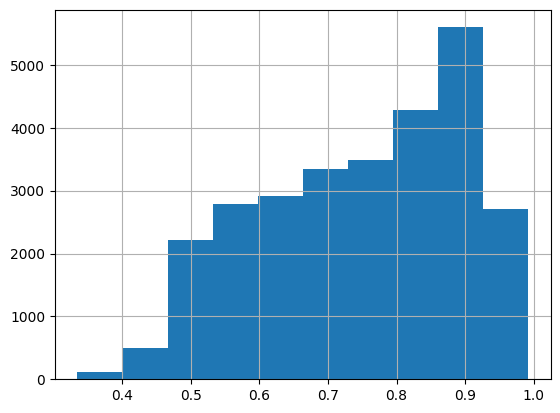

In [121]:
df.sent_score.hist()

In [95]:
relevant_news_items = df.thread_root.unique()
df_news_feed = get_news_feed()
df_news_feed = df_news_feed[df_news_feed.post_id.isin(relevant_news_items)]
df_news_feed['news_item'] = True
df['news_item'] = False
df_news_feed

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,quotes,quoted_author,labels,news_item
0,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
1,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
2,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
4,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
5,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42100,8540816,319,com,1976-05-30 12:11:41.939,Decades before he was among the Supreme Court ...,[eng],87,6,21,NaN,NaN,NaN,NaN,NaN,NaN,None,True
42103,1233312,319,com,1976-05-30 12:11:21.712,Prosecutors accuse Trump of showing off classi...,None,26,6,8,NaN,NaN,NaN,NaN,NaN,NaN,None,True
42106,3517724,27155,com,1976-05-30 13:16:41.125,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,NaN,NaN,None,True
42109,44325423,319,com,1976-05-30 12:10:11.843,Florida Gov. Ron DeSantis’s wealthy donors and...,None,19,6,6,NaN,NaN,NaN,NaN,NaN,NaN,None,True


In [96]:
df_news_feed['news_item'] = True
df['news_item'] = False 
df = pd.concat([df_news_feed, df])
#df = df.loc[df.thread_root_author == 379]
df = df.convert_dtypes({'user_id': int, 'post_id':int})
df.drop_duplicates(subset=['post_id'], inplace=True)
df['missing'] = False 
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,...,thread_root_author,quotes,quoted_author,labels,news_item,repost_from,reposted_author,sent_label,sent_score,missing
0,3517724,27155,com,1976-05-30 13:16:41.125000,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
7,3753243,379,com,1976-05-31 15:06:22.341000,"A conservative social media influencer, Isabel...",[eng],153,12,26,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
16,697660,379,com,1976-05-31 15:06:22.306000,Donald Trump accused Jewish voters of hating t...,[eng],55,16,18,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
18,10705540,9,org,1976-05-31 15:06:22.303000,More than 50 other countries have already bann...,[eng],150,9,32,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
27,936433,9,org,1976-05-31 15:06:22.221000,The U.S. Supreme Court on Monday declined to s...,[eng],217,22,34,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,1976-05-31 15:04:51.347,La preuve qu'ils sont antidémocratiques. Pers...,"['eng', 'fra']",4,0,0,5550653,...,4890,<NA>,<NA>,<NA>,False,<NA>,<NA>,<NA>,<NA>,False
36817,105014318,92560,bsky.social,1976-05-31 15:04:40.159,What a complete abdication of good journalism ...,['eng'],0,0,0,698597,...,9,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.79,False
36818,105014322,92560,bsky.social,1976-05-31 15:04:32.216,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576,...,379,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.867,False
36819,105014501,92560,bsky.social,1976-05-31 14:30:50.808,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919,...,379,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.882,False


In [97]:
# Number of unique nodes in the DataFrame
unique_nodes_in_df = len(set(df['post_id']).union(set(df['reply_to'])))
print(f"Number of unique nodes in the DataFrame: {unique_nodes_in_df}")

df_missing = pd.DataFrame(set(df['reply_to']) - set(df['post_id']), columns=['post_id']).dropna()
df_missing.merge(df[['reply_to', 'thread_root', 'thread_root_author']].drop_duplicates(), left_on='post_id', right_on='reply_to', how='left').drop(columns=['reply_to'])


df_missing

Number of unique nodes in the DataFrame: 53153


,post_id
0,58818563
1,58818567
2,85753871
3,97386512
4,3833871
...,...
10140,425975
10141,425977
10142,97583098
10143,162430973


In [98]:
df_missing = df_missing.merge(df[['reply_to', 'thread_root', 'thread_root_author']].drop_duplicates(), left_on='post_id', right_on='reply_to', how='left').drop(columns=['reply_to'])
df_missing['news_item'] = False 
df_missing['missing'] = True

#df = pd.concat([df_missing, df])
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,...,thread_root_author,quotes,quoted_author,labels,news_item,repost_from,reposted_author,sent_label,sent_score,missing
0,3517724,27155,com,1976-05-30 13:16:41.125000,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
7,3753243,379,com,1976-05-31 15:06:22.341000,"A conservative social media influencer, Isabel...",[eng],153,12,26,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
16,697660,379,com,1976-05-31 15:06:22.306000,Donald Trump accused Jewish voters of hating t...,[eng],55,16,18,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
18,10705540,9,org,1976-05-31 15:06:22.303000,More than 50 other countries have already bann...,[eng],150,9,32,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
27,936433,9,org,1976-05-31 15:06:22.221000,The U.S. Supreme Court on Monday declined to s...,[eng],217,22,34,<NA>,...,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,1976-05-31 15:04:51.347,La preuve qu'ils sont antidémocratiques. Pers...,"['eng', 'fra']",4,0,0,5550653,...,4890,<NA>,<NA>,<NA>,False,<NA>,<NA>,<NA>,<NA>,False
36817,105014318,92560,bsky.social,1976-05-31 15:04:40.159,What a complete abdication of good journalism ...,['eng'],0,0,0,698597,...,9,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.79,False
36818,105014322,92560,bsky.social,1976-05-31 15:04:32.216,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576,...,379,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.867,False
36819,105014501,92560,bsky.social,1976-05-31 14:30:50.808,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919,...,379,<NA>,<NA>,<NA>,False,<NA>,<NA>,0,0.882,False


In [104]:
df_graph = df.copy()
G = nx.from_pandas_edgelist(df_graph.dropna(subset=['post_id', 'reply_to']), source='post_id', target='reply_to', edge_attr=True, create_using=nx.DiGraph)
sent_score_dict = df_graph.set_index('post_id')['sent_score'].to_dict()
thread_root_dict = df_graph.set_index('post_id')['thread_root'].to_dict()
user_id_dict = df_graph.set_index('post_id')['user_id'].to_dict()
news_item_dict = df_graph.set_index('post_id')['news_item'].to_dict()
missing_dict = df_graph.set_index('post_id')['missing'].to_dict()

nx.set_node_attributes(G, sent_score_dict, 'sent_score')
nx.set_node_attributes(G, thread_root_dict, 'thread_root')
nx.set_node_attributes(G, user_id_dict, 'user_id')
nx.set_node_attributes(G, news_item_dict, 'news_item')
nx.set_node_attributes(G, missing_dict, 'missing')

In [105]:
comps = list(nx.weakly_connected_components(G))
list_comps = []

for i, component in enumerate(comps):
    for node in G.subgraph(component).nodes(data=True):
        # Get node attributes
        node_data = {}
        node_data['component_id'] = i
        node_data['component_size'] = len(component)
        node_data['post_id'] = node[0]
        node_data.update(node[1])

        list_comps.append(node_data)
    
df_comps = pd.DataFrame(list_comps)
df_comps.dropna(subset=['post_id'], inplace=True)
df_comps

,component_id,component_size,post_id,sent_score,thread_root,user_id,news_item,missing
0,0,3,10657080,0.945,10657081.0,284413.0,False,False
1,0,3,10657081,NaN,NaN,15717.0,True,False
2,0,3,149134681,0.873,10657081.0,194186.0,False,False
3,1,2,5595208,NaN,NaN,2486.0,True,False
4,1,2,10657084,0.956,5595208.0,284413.0,False,False
...,...,...,...,...,...,...,...,...
52867,16152,2,69291372,0.665,6050347.0,347274.0,False,False
52868,16153,2,69291373,0.480,6050347.0,347274.0,False,False
52869,16153,2,65305775,NaN,NaN,NaN,NaN,NaN
52870,16154,2,171050451,NaN,5550653.0,141248.0,False,False


<Axes: xlabel='component_size', ylabel='sent_score'>

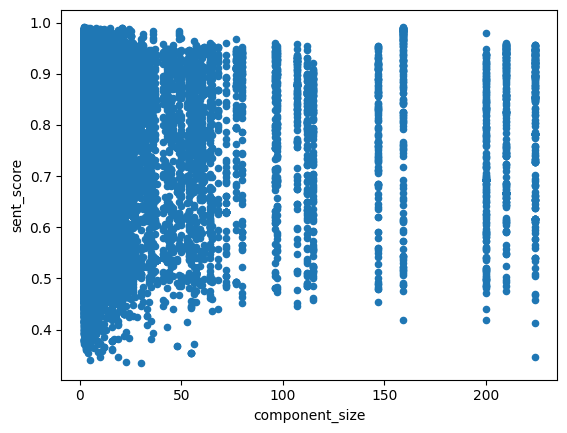

In [114]:
df_comps.dropna(subset=['sent_score'], inplace=True) 
df_comps.plot(kind='scatter', x='component_size', y='sent_score')

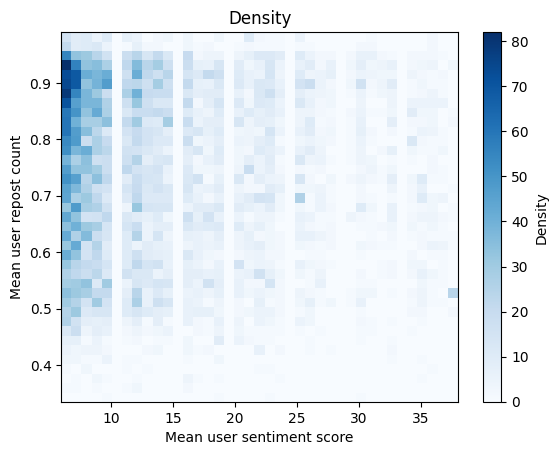

In [120]:
import matplotlib.pyplot as plt
df_comps = df_comps[df_comps.component_size < 40]
gridx = np.linspace(min(df_comps.component_size), max(df_comps.component_size), 40)
gridy = np.linspace(min(df_comps.sent_score), max(df_comps.sent_score), 40)
heatmap, xedges, yedges = np.histogram2d(df_comps.component_size, df_comps.sent_score, bins=[gridx, gridy])

# Plot the heatmap
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(heatmap.T, origin='lower', extent=myextent, cmap='Blues', aspect='auto')
plt.colorbar(label='Density')
plt.title('Density')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Mean user repost count')
plt.show()

In [65]:
df_comps.loc[52870, 'node']

(171050451, {'sent_score': nan, 'thread_root': 5550653.0})

In [50]:
node_data

{'component_id': 0, 'node': nan, 'component_size': 464}

In [53]:
largest_component = max(nx.weakly_connected_components(G), key=len)
largest_subgraph = G.subgraph(largest_component).copy()

In [54]:
largest_subgraph.nodes(data=True)

NodeDataView({136651268: {'sent_score': 0.809, 'thread_root': 126715.0}, 119221768: {'sent_score': 0.656, 'thread_root': 126715.0}, 169229834: {'sent_score': 0.782, 'thread_root': 126715.0}, 41633292: {'sent_score': 0.922, 'thread_root': 126715.0}, 216661517: {'sent_score': 0.782, 'thread_root': 126715.0}, 31378449: {'sent_score': 0.54, 'thread_root': 126715.0}, 82425364: {'sent_score': 0.877, 'thread_root': 126715.0}, 196710939: {'sent_score': 0.922, 'thread_root': 126715.0}, 152750108: {'sent_score': 0.782, 'thread_root': 126715.0}, 130014237: {'sent_score': 0.854, 'thread_root': 126715.0}, 89083423: {'sent_score': 0.865, 'thread_root': 126715.0}, 165648416: {'sent_score': 0.845, 'thread_root': 126715.0}, 3565090: {'sent_score': 0.8250000000000001, 'thread_root': 126715.0}, 71317039: {'sent_score': 0.926, 'thread_root': 126715.0}, 4439095: {'sent_score': 0.895, 'thread_root': 126715.0}, 22064701: {'sent_score': 0.865, 'thread_root': 126715.0}, 198238782: {'sent_score': 0.782, 'thread

In [8]:
print(f"Directed = {nx.is_directed_acyclic_graph(G)}\nTree = {nx.is_tree(G)}\nStrongly connected = {nx.is_strongly_connected(G)}\nWeakly connected = {nx.is_weakly_connected(G)}\
    \nStrongly connected components = {nx.number_strongly_connected_components(G)}\nWeakly connected components = {nx.number_weakly_connected_components(G)}\n")


Directed = True
Tree = False
Strongly connected = False
Weakly connected = False    
Strongly connected components = 15939
Weakly connected components = 4430



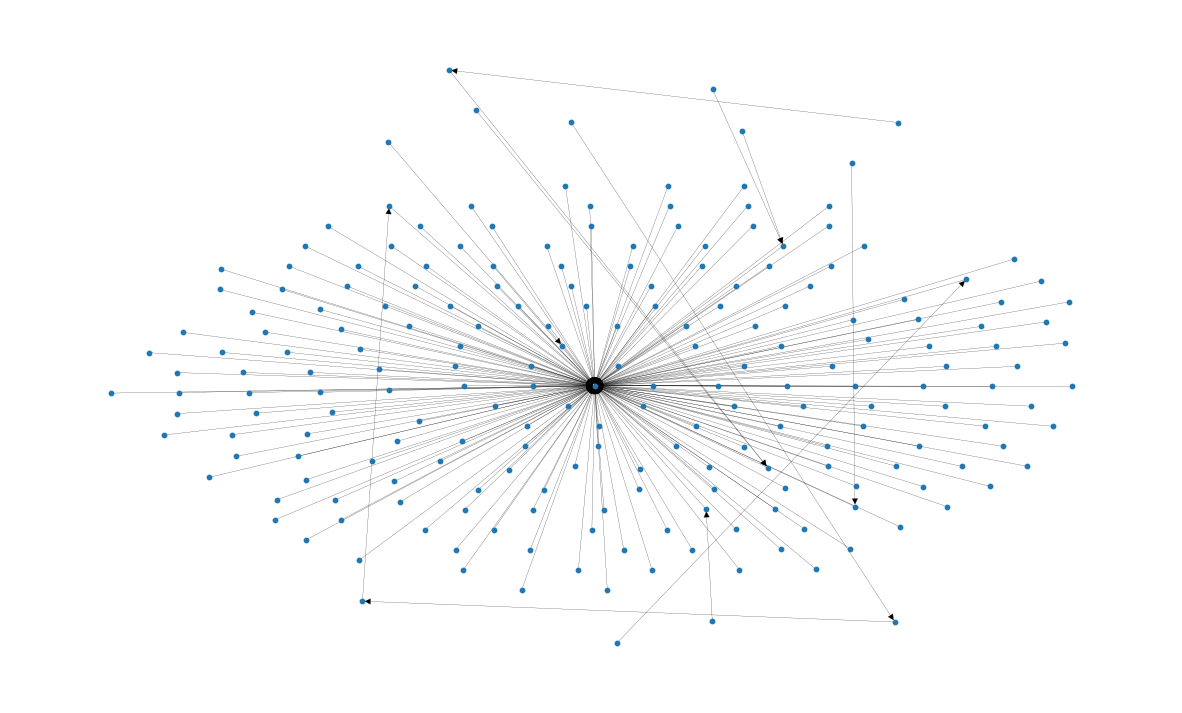

In [19]:
import matplotlib.pyplot as plt

pos = graphviz_layout(largest_subgraph, prog='fdp')
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(largest_subgraph, pos=pos, ax=ax, **plot_options)

In [ ]:
list(largest_subgraph.nodes())